# ISTM 6212 - Data Management for Analytics 
# Final Project - The LA Glam, Find your Dream House in LA
### Group members: Meng, Lingyao; Qureshi, Kamran; Wang, Qinya; Zheng, Tianweibao

##### Attestation
All of us contributed significantly to the project. We will upload the exact same copy to our github accounts.

#### Warning
This script will run smoothly on **local** machine if one follow the instructions in the markdown cells. May crush the kernel if the user attempt otherwise. 

## Part 1 - Selection (30 points)
                    
#### Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome. 

Our [dataset][] is the valuation and property description for parcels on the assessor's annual secured assessment rolls 2006 through 2016 thatcontains detailed and complete information of each assessment. It consists of valuation records of different properties in LA city. 

We want to explore the relationship between property value and other variables such as number of rooms, square feet, location, year of built, etc. To control the variables, we choose to focus on exploring properties that are single family residence. By doing so we hope to give some guidance to family who plans to buy residential house in LA.

There are 26143995 rows in the metadata, making the data size too large. We firstly applied the filter below directly on the website before downloading the dataset into notebook: Roll year = 2016 Property type = SFR (single family residence) Bedroom > 3 Bathroom > 2. Rollyear = 2016 makes sure that we don't have to take inflation or deflation in to consideration when we look at the total value of individual properties when run analysis. The other filters are based on assumptions of the target audience: family who want to settle down in LA, who are going to need houses that have more than 3 bedrooms and 2 bathrooms. 

[dataset]: https://data.lacounty.gov/Parcel-/Assessor-Parcels-Data-2006-thru-2016/9trm-uz8i

Direct download link:https://data.lacounty.gov/api/views/e4i3-cg6s/rows.csv?accessType=DOWNLOAD

In [1]:
!wget https://data.lacounty.gov/api/views/e4i3-cg6s/rows.csv?accessType=DOWNLOAD

--2016-12-08 22:03:13--  https://data.lacounty.gov/api/views/e4i3-cg6s/rows.csv?accessType=DOWNLOAD
Resolving data.lacounty.gov (data.lacounty.gov)... 52.206.68.26
Connecting to data.lacounty.gov (data.lacounty.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [                   <=>] 141.26M  1.15MB/s   in 4m 15s 

Last-modified header invalid -- time-stamp ignored.
2016-12-08 22:07:40 (566 KB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [148118134]



After downloading the data to notebook, we rename it to ease the following process

In [2]:
!mv rows.csv?accessType=DOWNLOAD p3.csv

**>>If the above link does not work, try this one<<**

In [1]:
!wget https://github.com/qyw0/istm-6212/raw/master/project3/p3.zip

--2016-12-09 05:30:08--  https://github.com/qyw0/istm-6212/raw/master/project3/p3.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qyw0/istm-6212/master/project3/p3.zip [following]
--2016-12-09 05:30:08--  https://raw.githubusercontent.com/qyw0/istm-6212/master/project3/p3.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25790934 (25M) [application/octet-stream]
Saving to: ‘p3.zip’

p3.zip              100%[=====================>]  24.60M  65.9MB/s   in 0.4s   

2016-12-09 05:30:09 (65.9 MB/s) - ‘p3.zip’ saved [25790934/25790934]



In [2]:
!unzip p3.zip

Archive:  p3.zip
  inflating: p3.csv                  


Then we explore the data by listing what are the columns:

In [3]:
!csvcut -n p3.csv

  1: ZIPcode
  2: TaxRateArea_CITY
  3: AIN
  4: RollYear
  5: TaxRateArea
  6: AssessorID
  7: PropertyLocation
  8: PropertyType
  9: PropertyUseCode
 10: GeneralUseType
 11: SpecificUseType
 12: SpecificUseDetail1
 13: SpecificUseDetail2
 14: totBuildingDataLines
 15: YearBuilt
 16: EffectiveYearBuilt
 17: SQFTmain
 18: Bedrooms
 19: Bathrooms
 20: Units
 21: RecordingDate
 22: LandValue
 23: LandBaseYear
 24: ImprovementValue
 25: ImpBaseYear
 26: TotalLandImpValue
 27: HomeownersExemption
 28: RealEstateExemption
 29: FixtureValue
 30: FixtureExemption
 31: PersonalPropertyValue
 32: PersonalPropertyExemption
 33: isTaxableParcel?
 34: TotalValue
 35: TotalExemption
 36: netTaxableValue
 37: SpecialParcelClassification
 38: AdministrativeRegion
 39: Cluster
 40: ParcelBoundaryDescription
 41: HouseNo
 42: HouseFraction
 43: StreetDirection
 44: StreetName
 45: UnitNo
 46: City
 47: ZIPcode5
 48: rowID
 49: CENTER_LAT
 50: CENTER_LON
 51: Location 1


### Columns meaning:
1. ZIPcode: 9 digit zip code
2. TaxRateArea_CITY:  City name based on tax rate area
3. AIN: 10-digit number assigned to each parcel within LA County. This is the same as AssessorID but here stored without the embedded hyphens
4. RollYear: the year the property is assessed
5. TaxRateArea: Code that specifies the geographic area used in establishing the tax rates applied to the property
6. AssessorID: Unique 10-digit number assigned to each individual parcel in Los Angeles County. This is the same as AIN(column 3).
7. PropertyLocation: Complete address of the property
8. PropertyType: Abbreviated form of property use type based on PropertyUseCode: SFR=Single Family Residence 
9. PropertyUseCode: 4-character property use code describing the overall use of the property.
10. GeneralUseType: General use type of the property (1st character of PropertyUseCode).
11. SpecificUseType: More specific use type of the property (2nd character of PropertyUseCode).
12. SpecificUseDetail1: Additional property usage detail (3rd character of PropertyUseCode).
13. SpecificUseDetail2: Additional property usage detail (4th character of PropertyUseCode).
14. totBuildingDataLines: Total number of building data lines (individual structures). Although the Assessor maintains a complete set of property records on paper within the parcel jackets, only up to 5 building data lines can be stored in the current property data base. The 5 most significant structures are typically the ones selected.
15. YearBuilt: Year property was originally built, If more than one structure (totBuldingDataLines>1) this is will be the earliest year built.
16. EffectiveYearBuilt: Effective year built taking into account subsequent construction, remodeling, building maintenance, etc.
17. SQFTmain: Total square footage of the main structure(s).
18. Bedrooms: Total number of bedrooms.
19. Bathrooms: Total number of bathrooms.
20. Units: Total number of living units.
21. RecordingDate: Latest recording date, whether reappraisable or non-reappraisable. 
22. LandValue: Land value on this assessment roll.
23. LandBaseYear: Land base year established by Proposition 13. Changes to land base year are triggered only by re-appraisable change-of-ownership.
24. ImprovementValue: Improvement value on this assessment roll.
25. ImpBaseYear: Improvement base year established by Proposition 13. Changes to improvement base year are triggered only by re-appraisable change-of-ownership or major new construction.
26. TotalLandImpValue: Total LandValue + ImprovementValue on this assessment roll.
27. HomeownersExemption: Homeowner's exemption value on the assessment roll.
28. RealEstateExemption: Real estate exemption value on this assessment roll
29. FixtureValue: Fixture value on this assessment roll.
30. FixtureExemption: Fixture value on this assessment roll.
31. PersonalPropertyValue: Personal property value on this assessment roll.
32. PersonalPropertyExemption: Personal property exemption value on this assessment roll.
33. isTaxableParcel?: Y=taxable fee parcel; N=non-taxable non-fee parcel. 
34. TotalValue:  LandValue + ImprovementValue + FixtureValue + PersonalPropertyValue
35. TotalExemption: HomeownersExemption + RealEstateExemption + FixtureExemption + PersonalPropertyExemption  
36. netTaxableValue: Total value minus Exemption value. (column 34 - column 35)
37. SpecialParcelClassification: Special parcel classification, such as type of non-taxable parcel. Informational only.
38. AdministrativeRegion: Assessor's administrative office responsible for maintaining the property records for this parcel. 
39. Cluster: Geographical area by which similar types and uses of parcels are grouped.  
40. ParcelBoundaryDescription:  Internal description used by the Assessor for assessment purposes.
41. HouseNo: House number in the property’s address. 
42. HouseFraction: Fraction associated with HouseNo in the property’s address (example 1/2). Almost always matches the actual street address.
43. StreetDirection:  N, S, E, W, or blank. 
44. StreetName:  Street name in the property’s address.
45. UnitNo:  Unit number in the property’s address.
46. City: City name and State in the property’s address.
47. ZIPcode5: 5-digit zip code
48. rowID: row identifier comprised of concatenated RollYear and AIN.
49. CENTER_LAT: latitude
50. CENTER_LON: longitude
51. Location 1: Street name and coordinates

Find the current working directory.

In [3]:
!pwd

/home/jovyan/work


Load data into dataframe for initial exploration. When running on your local machine, substitue "/home/lingyao/Desktop/ISTM6212" with your !pwd result from above

In [4]:
import pandas as pd
df = pd.read_csv('/home/jovyan/work/p3.csv')

KeyboardInterrupt: 

We are interested in finding out if having a pool can have some impact on the price of the house. Let's find out what kind of pool are out there!

All entries about 'Pool' are in 'SpecificUseDetail2' of the dataset. Therefore let's find out what else is in that column. 

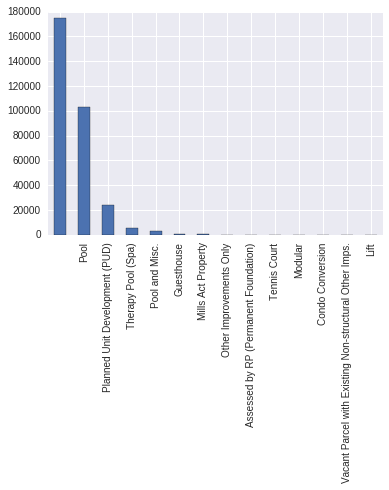

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.axis('equal')
df['SpecificUseDetail2'].value_counts().plot(kind='bar')

There appear to be more than one kind of usage in this column, however, we are only interested in pool. Therefore we create a new column named 'Pool', in which True is when the house have a pool, and False is otherwise

In [4]:
df['Pool'] = (df['SpecificUseDetail2'] == 'Pool')


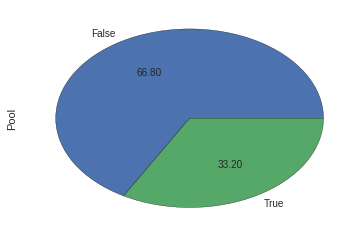

In [5]:
df['Pool'].value_counts().plot(kind='pie',autopct='%.2f')

Then we can explore a little about the total price of the house. 

In [6]:
#df['TotalValue'].plot(kind='bar')
df['TotalValue'].describe()

count         310757
unique        192671
top       $650000.00
freq             118
Name: TotalValue, dtype: object

Convert the currency to number for further exploration

In [7]:
df['TotalValue']=df['TotalValue'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

In [8]:
df['TotalValue'].describe()

count    3.107570e+05
mean     8.335643e+05
std      1.671932e+06
min      0.000000e+00
25%      3.194600e+05
50%      5.272000e+05
75%      8.791670e+05
max      5.830608e+08
Name: TotalValue, dtype: float64

We want to give prices meaning. Here we chose 'Affordable', 'Comfortable', 'Luxury' in correspondence with the price range in between 0, 650000, 4000000, 49000000. Then we want to know how those price range make up the entire dataset

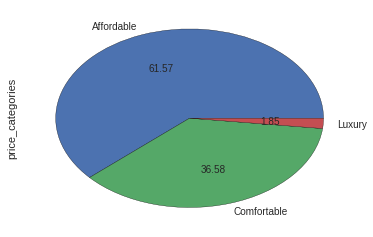

In [9]:
bins = [0, 650000, 4000000, 49000000]
group_names = ['Affordable', 'Comfortable', 'Luxury']
categories = pd.cut(df['TotalValue'], bins, labels=group_names)
df['price_categories'] = pd.cut(df['TotalValue'], bins, labels=group_names)
df['price_categories'].value_counts().plot(kind='pie',autopct='%.2f')

Interesting find about the price by categories. 

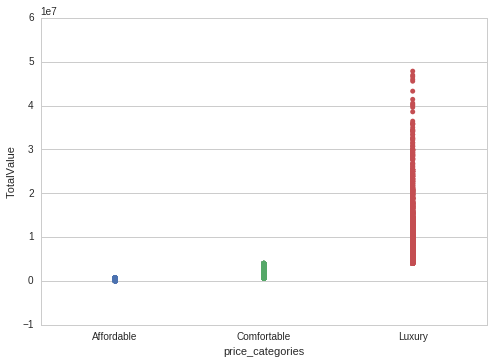

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(df['price_categories'],df[ 'TotalValue'])

Boxplot suggests that there is no relationship between having a pool with having a higher price across all price categories. 

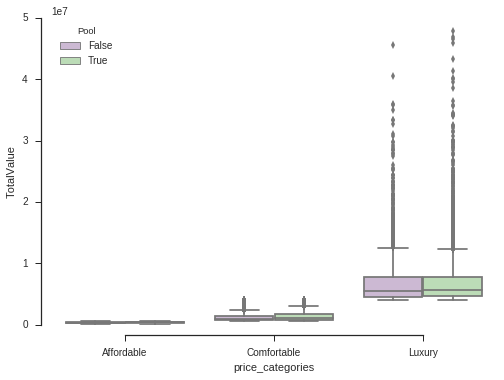

In [12]:
import seaborn as sns
sns.set(style="ticks")
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(df['price_categories'],df[ 'TotalValue'], hue=df['Pool'], palette="PRGn")
sns.despine(offset=10, trim=True)

In [13]:
import statsmodels.formula.api as sm
result = sm.ols(formula= 'df["TotalValue"] ~ df["Pool"]', data=df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:       df["TotalValue"]   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5574.
Date:                Thu, 08 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:37:45   Log-Likelihood:            -4.8912e+06
No. Observations:              310757   AIC:                         9.782e+06
Df Residuals:                  310755   BIC:                         9.782e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           6.771e+05   3637

Single linear regression between TotalValue and Pool suggests that having a pool is statistically signifcant factor to the total value of the house. As one can see the pvalue being extremely low. However, one can also argue that Pool have very limited predictive power on total value of the house alone in the single linear regression with the r-squared of 0.018. This means that having a pool or not can only explain 1.8% of variation in the total value of the house. Therefore we should explore more variables to find out what other variables are significant. 

In [14]:
import statsmodels.formula.api as sm
result = sm.ols(formula= 'df["TotalValue"] ~ df["Pool"]+df["EffectiveYearBuilt"]+df["Bedrooms"]+df["Bathrooms"]', data=df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:       df["TotalValue"]   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                 1.869e+04
Date:                Thu, 08 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:37:45   Log-Likelihood:            -4.8604e+06
No. Observations:              310757   AIC:                         9.721e+06
Df Residuals:                  310752   BIC:                         9.721e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

Multiple linear regression with 'Pool', 'EffectiveYearBuilt', 'Bedrooms', 'Bathrooms' as predicting variables to total value of the house. This model gives us more plausible R-square of 0.194, which means all four variables combined can explain almost 20% of variation in the total value of the house in the LA region. In this model, we can also see that 'Pool', 'EffectiveYearBuilt', 'Bathrooms' are significant predictors while 'Bedrooms' is not. Our guess is that the number of bathrooms and bedrooms are correlated therefore 'Bedrooms' is not a significant unique predictor of total value of the house. Further study maybe required to examine the relationship between more variables in later projects. 

What's going on? Does pool have any impact on price at all? 

## Part 2 - Wrangling (35 points)

#### Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values. Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

We already filtered the metadata, however, there are too many columns that we decide to drop some as the following reasons:
2  TaxRateArea_CITY:   same information as address

3  AIN: 10-digit number included in rowID

4  RollYear: We already decided to focus on data of 2016

5 TaxRateArea: This is the same number as AIN(column 3).

6 AssessorID:we are not interested in the assessor

7 PropertyLocation: Address information is listed seperately in columns 41-47

8 PropertyType: We are only exploring SFR.

9 PropertyUseCode: We are only exploring SFR.

10 GeneralUseType: Identical value in this column,residential

14 totBuildingDataLines: Irrelevant to our analysis

21 RecordingDate: Irrelevant to our analysis

23 LandBaseYear: Year of change ownership is irrelevant to our analysis

25 ImpBaseYear: Year of change ownership. Irrelevant to our analysis

26 TotalLandImpValue: Total LandValue + ImprovementValue on this assessment roll.

27 HomeownersExemption: Homeowner's exemption value on the assessment roll.

28 RealEstateExemption: Real estate exemption value on this assessment roll

30 FixtureExemption: Not the focus of our analysis

31 PersonalPropertyValue: Not the focus of our analysis

32 PersonalPropertyExemption: Not the focus of our analysis

33 isTaxableParcel?: Taxable or not are not affective 

34 TotalValue: Can be computed as LandValue + ImprovementValue + FixtureValue + 
PersonalPropertyValue

35 TotalExemption: Can be computed as HomeownersExemption + RealEstateExemption + FixtureExemption + PersonalPropertyExemption 

36 netTaxableValue: Can be computed as (column 34 - column 35)

37 SpecialParcelClassification: Irrelevant to our analysis

38 AdministrativeRegion: Irrelevant to our analysis

39 Cluster:Irrelevant to our analysis  

40 ParcelBoundaryDescription:  Irrelevant to our analysis

42 HouseFraction: Irrelevant to our analysis

51 Location 1: We already have detailed address and coordinates

In [15]:
!csvcut -c21 p3.csv | csvstat

  1. RecordingDate
	<class 'int'>
	Nulls: False
	Min: 19460923
	Max: 20151231
	Sum: 6234983446246
	Mean: 20063855.186676405
	Median: 20090204
	Standard Deviation: 82974.05651650776
	Unique values: 11232
	5 most frequent values:
		20121228:	261
		20121231:	246
		20151231:	235
		20130531:	214
		20150529:	210

Row count: 310757


so we use !cut to drop the redundant columns and output a new csv file named p31.csv, the size is shranked

In [3]:
!csvcut -c1,11-13,15-20,22,24,29,41,43-50 p3.csv > p31.csv

In [6]:
!csvcut -n p31.csv

  1: ZIPcode
  2: SpecificUseType
  3: SpecificUseDetail1
  4: SpecificUseDetail2
  5: YearBuilt
  6: EffectiveYearBuilt
  7: SQFTmain
  8: Bedrooms
  9: Bathrooms
 10: Units
 11: LandValue
 12: ImprovementValue
 13: FixtureValue
 14: HouseNo
 15: StreetDirection
 16: StreetName
 17: UnitNo
 18: City
 19: ZIPcode5
 20: rowID
 21: CENTER_LAT
 22: CENTER_LON


Now there are 22 variables left, let's examine the data further.
The new dataset seem to be normal.

In [18]:
!csvcut -c20,21,22 p31.csv | csvstat

  1. rowID
	<class 'int'>
	Nulls: False
	Min: 20162004001003
	Max: 20168765022045
	Sum: 6266415875014577263
	Mean: 20165003121456.887
	Median: 20164411014009
	Standard Deviation: 2296140842.4706125
	Unique values: 310757
  2. CENTER_LAT
	<class 'float'>
	Nulls: True
	Min: 33.33971975
	Max: 34.81962976
	Sum: 10607209.542702254
	Mean: 34.13466156507969
	Median: 34.117165985
	Standard Deviation: 0.22305192815144012
	Unique values: 306772
	5 most frequent values:
		34.12514642:	71
		34.12231882:	61
		33.82320686:	43
		34.41000082:	37
		34.04246356:	36
  3. CENTER_LON
	<class 'float'>
	Nulls: True
	Min: -118.93894426
	Max: -117.65252009
	Sum: -36755552.02533018
	Mean: -118.28165776978683
	Median: -118.325765495
	Standard Deviation: 0.25175979854352043
	Unique values: 306984
	5 most frequent values:
		-118.44404338:	71
		-118.4441575:	61
		-118.29368867:	43
		-118.4825075:	37
		-117.92674346:	36

Row count: 310757


In [19]:
!csvcut -c2,8,9,10 p31.csv | csvstat

  1. SpecificUseType
	<class 'str'>
	Nulls: True
	Values: Manufactured Home, Single Family Residence
  2. Bedrooms
	<class 'int'>
	Nulls: False
	Min: 4
	Max: 44
	Sum: 1370278
	Mean: 4.409483937610416
	Median: 4
	Standard Deviation: 0.716897695077448
	Unique values: 25
	5 most frequent values:
		4:	211004
		5:	79401
		6:	15650
		7:	3378
		8:	885
  3. Bathrooms
	<class 'int'>
	Nulls: False
	Min: 3
	Max: 93
	Sum: 1108725
	Mean: 3.5678198721187293
	Median: 3
	Standard Deviation: 1.0759236096722051
	Unique values: 31
	5 most frequent values:
		3:	208780
		4:	58078
		5:	26478
		6:	10399
		7:	4136
  4. Units
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 143
	Sum: 311134
	Mean: 1.0012131665577928
	Median: 1
	Standard Deviation: 0.37886878177855654
	Unique values: 20
	5 most frequent values:
		1:	309343
		0:	873
		2:	425
		3:	41
		4:	31

Row count: 310757


Take a look at the new data, we find there the above two columns need further filtering, because first, we are explorating Single Family Residence; Second, the number of rooms need to be controled in reasonable ranges, we assum the range of Bedrooms is[5,10], and that of Bathrooms is[3,6];finally, to precise our analysis, we assume Units to be 1. The filters are added below in the SQL part.

In [4]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Cell below is to work on datanotebook.org. please delete # when try to use datanotebook.org

In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [6]:
!createdb -U dbuser project03

In [7]:
%sql postgresql://dbuser@localhost:5432/project03

'Connected: dbuser@project03'

In [8]:
%%sql
DROP TABLE IF EXISTS la_assessment;
CREATE TABLE la_assessment (
    ZIPcode                CHAR(10),
    SpecificUseType        CHAR(30),
    SpecificUseDetail1     VARCHAR(64),
    SpecificUseDetail2     VARCHAR(64),
    YearBuilt              INTEGER,
    EffectiveYearBuilt     INTEGER,
    SQFTmain               DECIMAL,
    Bedrooms               INTEGER,
    Bathrooms              INTEGER,
    Units                  INTEGER,
    LandValue              MONEY,
    ImprovementValue       MONEY,
    FixtureValue           MONEY,
    HouseNo                VARCHAR(6),
    StreetDirection        VARCHAR(6),
    StreetName             VARCHAR(64),
    UnitNo                 VARCHAR(30),
    City                   VARCHAR(30),
    ZIPcode5               CHAR(5),
    rowID                  VARCHAR(20),
    CENTER_LAT             Decimal(10,8),
    CENTER_LON             Decimal(11,8)
);

Done.
Done.


[]

below is an result from my local machine. please subsitute my '/home/lingyao/Desktop/ISTM6212' with your !pwd result

In [9]:
!pwd

/home/jovyan/work


In [10]:
%%sql
COPY la_assessment FROM '/home/jovyan/work/p31.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

310757 rows affected.


[]

we want to clean our data further as:
2.Special Use Type=Single Family Residence
10.Units = 1 (Total number of living units)

In [11]:
%%sql 
DELETE FROM la_assessment
WHERE SpecificUseType NOT LIKE '%Single Family Residence%';

109 rows affected.


[]

In [12]:
%%sql 
SELECT SpecificUseType,COUNT(SpecificUseType) FROM la_assessment
GROUP BY SpecificUseType;

1 rows affected.


specificusetype,count
Single Family Residence,310648


In [13]:
%%sql 
DELETE FROM la_assessment
WHERE Units=0 OR Units>1;

1401 rows affected.


[]

In [14]:
%%sql 
SELECT Units,COUNT(Units) FROM la_assessment
GROUP BY Units;

1 rows affected.


units,count
1,309247


In [15]:
%%sql 
DELETE FROM la_assessment
WHERE Bedrooms>10;

76 rows affected.


[]

In [16]:
%%sql 
SELECT Bedrooms,COUNT(Bedrooms) FROM la_assessment
GROUP BY Bedrooms;

7 rows affected.


bedrooms,count
8,839
4,210303
5,78952
10,88
9,210
6,15470
7,3309


In [17]:
%%sql 
DELETE FROM la_assessment
WHERE Bathrooms>6;

6805 rows affected.


[]

In [18]:
%%sql 
SELECT Bathrooms,COUNT(Bathrooms) FROM la_assessment
GROUP BY Bathrooms;

4 rows affected.


bathrooms,count
4,57699
5,26229
3,208195
6,10243


In [19]:
%%sql 
ALTER TABLE la_assessment
DROP COLUMN SpecificUseType;

Done.


[]

In [20]:
%%sql 
ALTER TABLE la_assessment
DROP COLUMN Units;

Done.


[]

## Part 3 - Analysis (35 points) 

#### Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but be sure to export images and to include them properly in your writeup. 


add column Totalvalue=LandValue+ImprovementValue+FixtureValue

In [21]:
%%sql 
ALTER TABLE la_assessment
ADD COLUMN Totalvalue money;

Done.


[]

In [22]:
%%sql
UPDATE la_assessment
SET    Totalvalue = LandValue+ImprovementValue+FixtureValue;

302366 rows affected.


[]

In [23]:
import pandas
from pandas import DataFrame

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [30]:
%%sql 
SELECT Bedrooms,COUNT(Bedrooms) FROM la_assessment
GROUP BY Bedrooms
ORDER BY Bedrooms;

7 rows affected.


bedrooms,count
4,209751
5,76777
6,13063
7,2221
8,428
9,96
10,30


<Container object of 7 artists>

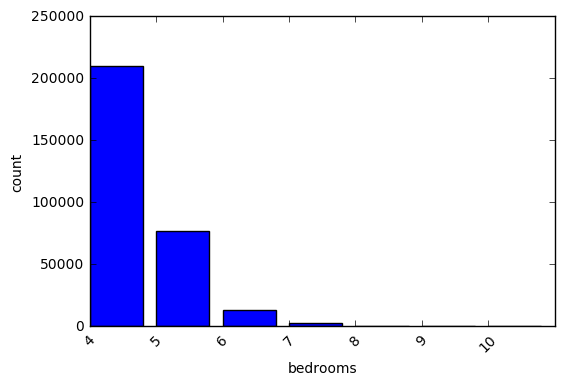

In [31]:
bedrooms = _
bedrooms.bar()

In [32]:
%%sql 
SELECT Bathrooms,COUNT(Bedrooms) FROM la_assessment
GROUP BY Bathrooms
ORDER BY Bathrooms;

4 rows affected.


bathrooms,count
3,208195
4,57699
5,26229
6,10243


<Container object of 4 artists>

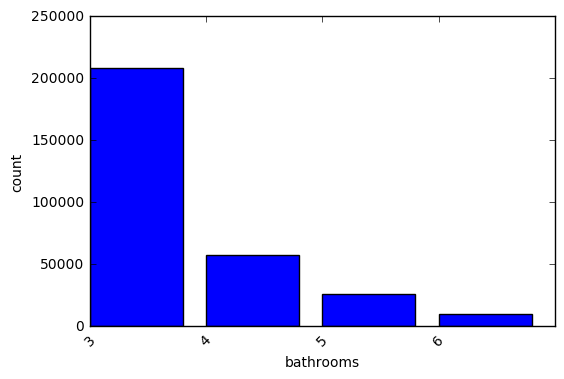

In [33]:
bathrooms = _
bathrooms.bar()

In [34]:
%%sql 
SELECT Bedrooms, AVG(CAST(Totalvalue AS decimal)) FROM la_assessment
GROUP BY Bedrooms
ORDER BY Bedrooms;

7 rows affected.


bedrooms,avg
4,657018.350425027771
5,908849.820506141162
6,1062606.003751052591
7,1174554.085096803242
8,1532844.014018691589
9,1666046.385416666667
10,1788516.300000000000


<Container object of 7 artists>

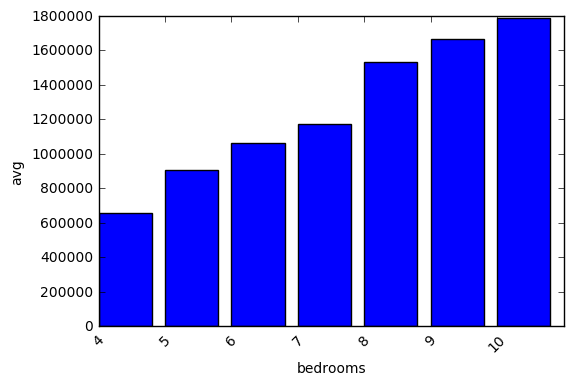

In [35]:
bedrooms = _
bedrooms.bar()

In [36]:
%%sql 
SELECT Bathrooms, AVG(CAST(Totalvalue AS decimal)) FROM la_assessment
GROUP BY Bathrooms
ORDER BY Bathrooms;

4 rows affected.


bathrooms,avg
3,507537.415816902423
4,945144.767084351549
5,1540008.173853368409
6,2377686.627452894660


<Container object of 4 artists>

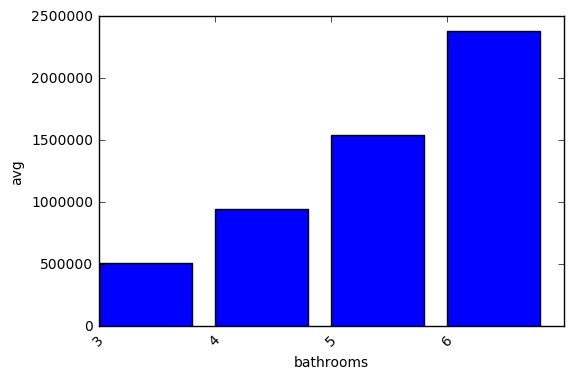

In [37]:
bathrooms = _
bathrooms.bar()

In [38]:
%%sql 
SELECT EffectiveYearBuilt,AVG(sqftmain) FROM la_assessment
WHERE effectiveyearbuilt >= 1990
GROUP BY EffectiveYearBuilt
ORDER BY EffectiveYearBuilt;

27 rows affected.


effectiveyearbuilt,avg
1990,3099.2864420516383003
1991,3263.8533844189016603
1992,3066.6579261025029797
1993,2972.2860230547550432
1994,2906.5649887302779865
1995,3081.8412309368191721
1996,3019.8562361155188829
1997,3075.0793650793650794
1998,3152.4571350314982197
1999,3215.2186567164179104


<Container object of 27 artists>

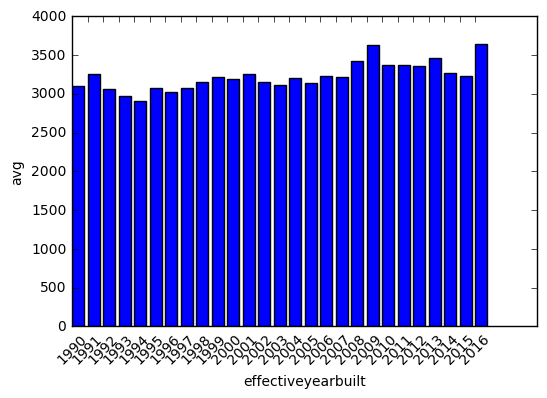

In [39]:
sqft = _
sqft.bar()

Average area of the property does not vary a lot by year. Except that for 2016 is a little higher than before. We are still looking for the reason.

Average property value each year and how many properties were built each year.

In [77]:
%%sql 
SELECT EffectiveYearBuilt,AVG(CAST(Totalvalue AS decimal)),COUNT(rowID) FROM la_assessment
WHERE effectiveyearbuilt > 0
GROUP BY EffectiveYearBuilt
ORDER BY EffectiveYearBuilt;

125 rows affected.


effectiveyearbuilt,avg,count
1866,180635.000000000000,1
1878,750843.000000000000,1
1890,277522.000000000000,1
1894,278569.000000000000,1
1895,238767.750000000000,4
1896,2826208.000000000000,1
1898,1188934.000000000000,1
1899,184111.400000000000,5
1900,523388.571428571429,7
1901,576292.083333333333,12


In [78]:
year = _
df = pandas.DataFrame.from_records(year,columns=['YEAR', 'AVG','COUNT'],index=['YEAR'])
df['AVG']=df['AVG'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

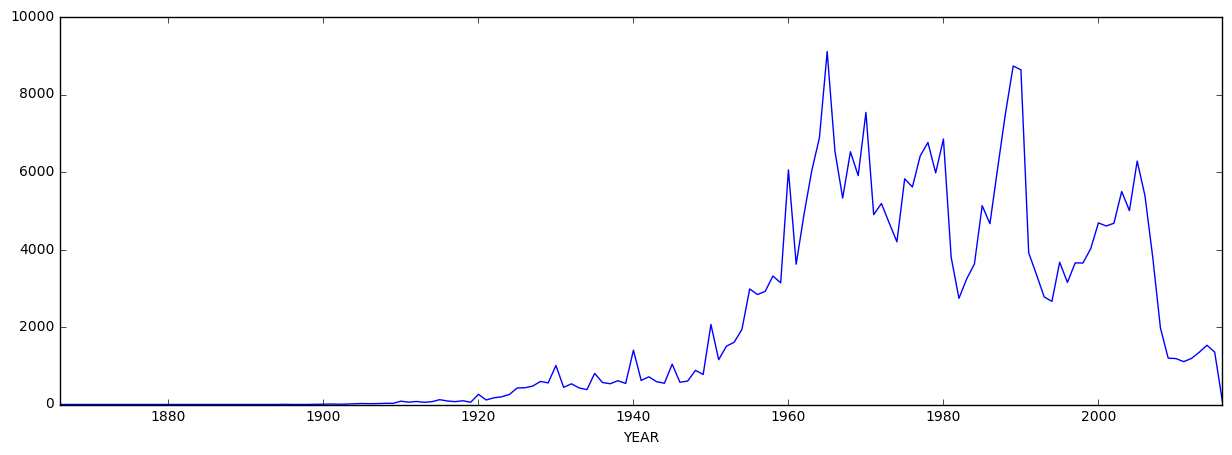

In [79]:
df['COUNT'].plot(figsize=(15,5))

This plot shows the number of properties built by year.  
There is a sudden drop around 1980.    
According to Wiki: "The early 1980s recession in the United States began in July 1981 and ended in November 1982. One cause was the Federal Reserve's contractionary monetary policy, which sought to rein in the high inflation. In the wake of the 1973 oil crisis and the 1979 energy crisis, stagflation began to afflict the economy."

There are also recessions in 1960, 1990. These recessions reflect as drops in our plot. So we can infer that real estate industry would suffer during resessions.  

Reference:  
https://en.wikipedia.org/wiki/Early_1980s_recession  
https://www.thebalance.com/the-history-of-recessions-in-the-united-states-3306011    
https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States


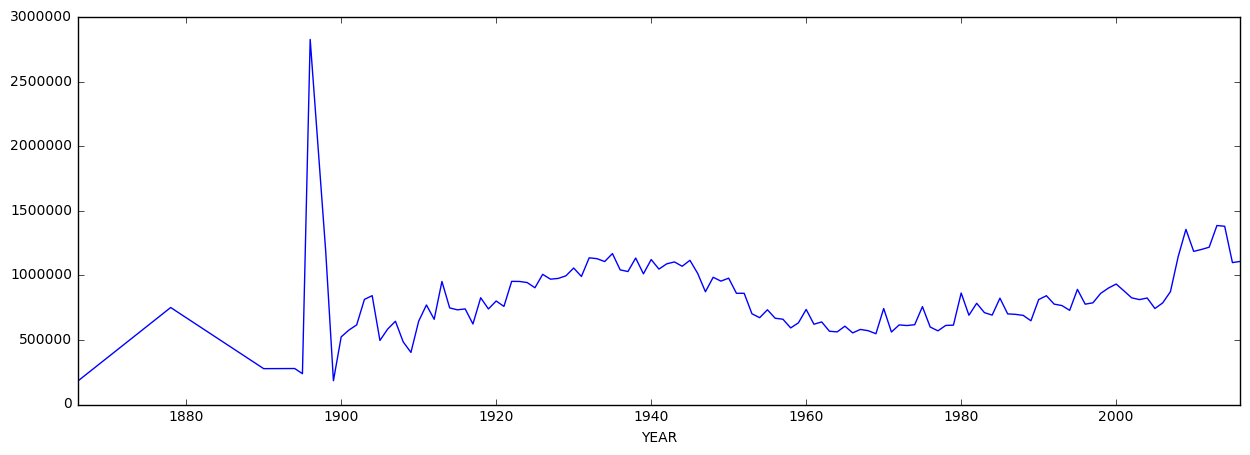

In [80]:
df['AVG'].plot(figsize=(15,5))

This plot shows the average value of properties built by year.  
There are two properties built 1896 and 1898 hava skyhigh value that cause the dramatic peak in the plot. Let's see their detailed information. 

In [44]:
%%sql
SELECT * FROM la_assessment
WHERE EffectiveYearBuilt = 1896 OR EffectiveYearBuilt = 1898;

2 rows affected.


zipcode,specificusedetail1,specificusedetail2,yearbuilt,effectiveyearbuilt,sqftmain,bedrooms,bathrooms,landvalue,improvementvalue,fixturevalue,houseno,streetdirection,streetname,unitno,city,zipcode5,rowid,center_lat,center_lon,totalvalue
91105-1625,,,1893,1896,5908,7,3,"$978,772.00","$1,847,436.00",$0.00,325,S,GRAND AVE,,PASADENA CA,91105,20165714014003,34.14013663,-118.16235911,"$2,826,208.00"
91001-2207,,Pool,1895,1898,5640,7,3,"$951,148.00","$237,786.00",$0.00,466,E,MARIPOSA ST,,ALTADENA CA,91001,20165840007007,34.18978932,-118.13961396,"$1,188,934.00"


These two are really big houses that have 7 bedrooms and 3 bathrooms. And their square feet are 5908 and 5640 respectively. That should help explain why they are so expensive.  
  
There are also a sudden increase right after 2008. We inferred that is due to the financial crisis is 2008. "The expansion in risky mortgages to underqualified borrowers was encouraged by the federal government ......Department of Housing and Urban Development's pressuring of lenders to extend mortgages to borrowers who previously would not have qualified."(L. H. White, 2009). Our guess is that with more unqualified borrowers got money, the demand in house market increased and thus, the price increased.
  
Reference:  
https://www.downsizinggovernment.org/hud/housing-finance-2008-financial-crisis  
https://en.wikipedia.org/wiki/United_States_housing_bubble

In [2]:
from IPython.display import Image
Image(url = "https://github.com/qyw0/istm-6212/blob/master/project3/distribution_by_year.png?raw=true")

In [29]:
Image(url = "https://github.com/qyw0/istm-6212/blob/master/project3/value_by_location.png?raw=true")

These two plots are generated by tableau based on our wrangled dataset. The green part(expensive houses) and blue part(new houses) are largely overlapped. New houses have better location. It helps explain the house built after 2008 are more expensive. 

In [45]:
%%sql 
SELECT City,COUNT(*) AS COUNT FROM la_assessment
GROUP BY City
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


city,count
LOS ANGELES CA,90865
SANTA CLARITA CA,14116
PALMDALE CA,13812
LANCASTER CA,10469
TORRANCE CA,6422
LONG BEACH CA,6279
DIAMOND BAR CA,5999
CERRITOS CA,5913
RNCHO PALOS VRDS CA,5517
WALNUT CA,5014


<Container object of 10 artists>

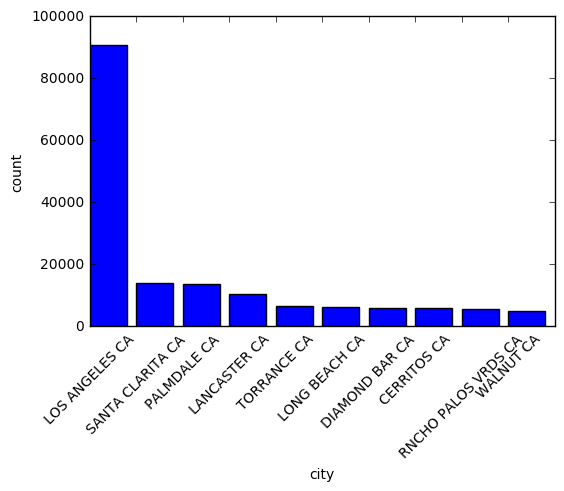

In [46]:
c = _
c.bar()

We can tell from the plot that the majority of the properties locate in LA city.

Now we would like to know which city has the highest average total value.

In [59]:
%%sql 
SELECT * FROM
(SELECT CITY,AVG(CAST(Totalvalue AS decimal)) AS AVG_TOTAL, COUNT(*) AS COUNT FROM la_assessment
GROUP BY CITY
ORDER BY AVG_TOTAL DESC) AS A
WHERE count>5
LIMIT 20;

20 rows affected.


city,avg_total,count
PACIFIC PALISADES,3411635.470588235294,17
PACIFIC PALISADES CA,2801788.535714285714,56
MALIBU CA,2655812.150000000000,2000
BEVERLY HILLS CA,2575256.599607458292,3057
RCH PALOS VRD CA,2261127.565217391304,23
PALOS VERDES ESTATES CA,2172213.967741935484,31
ROLLING HILLS CA,2082550.800469483568,426
MARINA DEL REY CA,2077338.393939393939,33
MANHATTAN BCH CA,2036477.147727272727,88
MARINA DEL REY,1965399.571428571429,7


In [60]:
VALUE = _
df = pandas.DataFrame.from_records(VALUE,columns=['CITY', 'AVG_TOTAL','COUNT'])
df['AVG_TOTAL']=df['AVG_TOTAL'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

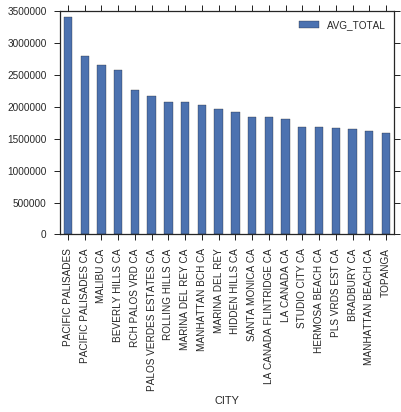

In [61]:
df.plot(x='CITY',y='AVG_TOTAL',kind='bar')

#### Dr. NotSoStrange's Dilemma

Dr. NotSoStrange just moved to LA with his wife and 4 teenage kids. Being a super specialist, life has been kind to him and he has earned enough to buy a house without having to pay for mortgage later. Dr. NotSoStrange wants to explore areas in LA where he could buy a house for his family to settle in.

Let's help Dr. NotSoStrange find a nice house !

Installing folium package which we are gonna use for map visualization

In [50]:
!pip install folium

    100% |████████████████████████████████| 71kB 4.1MB/s 
  Running setup.py bdist_wheel for folium ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/0c/7d/44/b16abc3193e1b2bb208fe5eaddcf200d763b45294904d2b1b8
Successfully built folium
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Importing packages we need to analyse our data

In [51]:
import csv
import pandas as pd
import urllib
import folium
from folium import plugins
from IPython.display import HTML, display

Let's show Dr NotSoStrange highest valued properties in LA.

In [52]:
%%sql
select * from la_assessment order by totalvalue desc
limit 20;

20 rows affected.


zipcode,specificusedetail1,specificusedetail2,yearbuilt,effectiveyearbuilt,sqftmain,bedrooms,bathrooms,landvalue,improvementvalue,fixturevalue,houseno,streetdirection,streetname,unitno,city,zipcode5,rowid,center_lat,center_lon,totalvalue
90265-5027,,,2014,2014,7715,5,6,"$36,033,683.00","$13,352,629.00",$0.00,22140,,PACIFIC COAST HWY,,MALIBU CA,90265,20164451006038,34.03867070,-118.65710547,"$49,386,312.00"
90024-1814,,Pool,1931,1972,11637,4,6,"$41,421,387.00","$5,177,673.00",$0.00,10231,,CHARING CROSS RD,,LOS ANGELES CA,90024,20164359011010,34.07796903,-118.43015782,"$46,599,060.00"
90210-2652,,Pool,1959,1985,7182,4,6,"$22,685,761.00","$13,152,563.00",$0.00,1163,N,HILLCREST RD,,BEVERLY HILLS CA,90210,20164391028019,34.09834019,-118.39338631,"$35,838,324.00"
90265-4603,,Pool,1974,1994,5627,4,5,"$27,056,538.00","$5,411,306.00",$0.00,23750,,MALIBU RD,,MALIBU CA,90265,20164458006031,34.03293062,-118.69294291,"$32,467,844.00"
90210-2222,,Pool,1957,1957,4318,4,6,"$25,888,367.00","$6,213,208.00",$0.00,1201,,LAUREL WAY,,BEVERLY HILLS CA,90210,20164348003021,34.09277812,-118.41761133,"$32,101,575.00"
90077-3519,,Pool,1938,1956,8783,9,6,"$20,000,000.00","$10,000,000.00",$0.00,444,N,FARING RD,,LOS ANGELES CA,90077,20164358007007,34.08653021,-118.43239301,"$30,000,000.00"
90265-2304,,Pool,1944,1995,5254,4,6,"$26,396,500.00","$2,335,075.00",$0.00,33222,,PACIFIC COAST HIGHWAY,,MALIBU CA,90265,20164473018021,34.04093579,-118.89822919,"$28,731,575.00"
90024-2601,,,1938,1938,2863,4,3,"$27,826,313.00",$0.00,$0.00,245,,CONWAY AVE,,LOS ANGELES CA,90024,20164359008015,34.07823245,-118.43497991,"$27,826,313.00"
90265-4338,,Pool and Misc.,1968,1990,3827,4,4,"$24,138,718.00","$1,261,956.00",$0.00,27560,,PACIFIC COAST HWY,,MALIBU CA,90265,20164460031003,34.02459643,-118.77442416,"$25,400,674.00"
90077-3810,,Pool,1937,1955,12536,6,6,"$22,000,000.00","$3,000,000.00",$0.00,283,,BEL AIR RD,,LOS ANGELES CA,90077,20164362020017,34.08269585,-118.43848229,"$25,000,000.00"


In [53]:
df = _.DataFrame()
map_osm = folium.Map(location=[34.052235, -118.243683])
for index, row in df.iterrows():
    folium.Marker(location=[row["center_lat"], row["center_lon"]], popup=row["totalvalue"]).add_to(map_osm)
#map_osm.save('osm.html')
map_osm


He wants to find a house in Beverly Hills. As he has 4 kids, he wants a house with more than 5 bedrooms, should not be too old and should have a pool

In [66]:
%%sql
select * from la_assessment 
where city like '%BEVERLY%' 
and bedrooms >5 
and bathrooms>5 
and yearbuilt>1990 
and specificusedetail2='Pool';

14 rows affected.


zipcode,specificusedetail1,specificusedetail2,yearbuilt,effectiveyearbuilt,sqftmain,bedrooms,bathrooms,landvalue,improvementvalue,fixturevalue,houseno,streetdirection,streetname,unitno,city,zipcode5,rowid,center_lat,center_lon,totalvalue
90210-3517,,Pool,2001,2001,11923,6,6,"$3,178,372.00","$2,358,060.00",$0.00,714,N,HILLCREST RD,,BEVERLY HILLS CA,90210,20164341007007,34.08656912,-118.39767322,"$5,536,432.00"
90210-2903,,Pool,1996,1996,8539,6,6,"$2,199,339.00","$1,901,551.00",$0.00,803,,FOOTHILL RD,,BEVERLY HILLS CA,90210,20164341026015,34.08397875,-118.40600346,"$4,100,890.00"
90210-3329,,Pool,2013,2013,8000,6,6,"$3,816,436.00","$3,386,197.00",$0.00,601,N,CRESCENT DR,,BEVERLY HILLS CA,90210,20164344008030,34.07602194,-118.40459546,"$7,202,633.00"
90210-3325,,Pool,2008,2008,12156,6,6,"$4,858,353.00","$3,769,299.00",$0.00,609,N,CANON DR,,BEVERLY HILLS CA,90210,20164344020010,34.07599953,-118.40661513,"$8,627,652.00"
90210-3205,,Pool,1991,1991,7394,6,6,"$4,136,480.00","$1,751,005.00",$0.00,726,N,CAMDEN DR,,BEVERLY HILLS CA,90210,20164345012019,34.07677809,-118.41376579,"$5,887,485.00"
90210-3211,,Pool,1991,1991,14361,6,6,"$2,060,830.00","$2,122,748.00",$0.00,711,N,ROXBURY DR,,BEVERLY HILLS CA,90210,20164345015006,34.07283534,-118.41473672,"$4,183,578.00"
90210-3207,,Pool,1994,1994,6033,6,6,"$1,335,301.00","$1,051,421.00",$0.00,605,N,RODEO DR,,BEVERLY HILLS CA,90210,20164345024003,34.07353454,-118.40876623,"$2,386,722.00"
90210-2301,,Pool,2013,2013,10000,6,6,"$2,534,428.00","$4,920,692.00",$0.00,1215,,CHANRUSS PL,,BEVERLY HILLS CA,90210,20164348001007,34.08975044,-118.41509969,"$7,455,120.00"
90210-2131,,Pool,1998,1998,8178,6,6,"$2,751,676.00","$2,123,171.00",$0.00,1160,,TOWER RD,,BEVERLY HILLS CA,90210,20164348015007,34.09269511,-118.42147283,"$4,874,847.00"
90212-3801,,Pool,2005,2005,4242,6,6,"$1,125,550.00","$1,347,414.00",$0.00,245,S,CAMDEN DR,,BEVERLY HILLS CA,90212,20164328025012,34.06315356,-118.40266529,"$2,472,964.00"


In [67]:
df2 = _.DataFrame()
map_ost = folium.Map(location=[34.073620, -118.400352],zoom_start=13)
for index, row in df2.iterrows():
    folium.Marker(location=[row["center_lat"], row["center_lon"]], popup=row["totalvalue"]).add_to(map_ost)
#map_osm.save('osm.html')
map_ost

If he decides that above houses are too expensive and wants to compromise, here are some without pool.

In [68]:
%%sql
select * from la_assessment 
where city like '%BEVERLY%' 
and bedrooms >5 
and bathrooms>5 
and yearbuilt>1990 
and specificusedetail2=' ';

5 rows affected.


zipcode,specificusedetail1,specificusedetail2,yearbuilt,effectiveyearbuilt,sqftmain,bedrooms,bathrooms,landvalue,improvementvalue,fixturevalue,houseno,streetdirection,streetname,unitno,city,zipcode5,rowid,center_lat,center_lon,totalvalue
90210-5504,,,2002,2002,4365,6,6,"$1,209,249.00","$494,397.00",$0.00,115,N,OAKHURST DR,,BEVERLY HILLS CA,90210,20164342032018,34.06829071,-118.39130206,"$1,703,646.00"
90210-1902,,,2001,2001,8446,6,6,"$674,424.00","$1,705,980.00",$0.00,360,,TROUSDALE PL,,BEVERLY HILLS CA,90210,20164391016006,34.10292035,-118.39420819,"$2,380,404.00"
90210-4924,,,1996,1996,4181,6,6,"$1,712,459.00","$560,286.00",$0.00,312,N,OAKHURST DR,,BEVERLY HILLS CA,90210,20164335017007,34.07178206,-118.39059582,"$2,272,745.00"
90210-4914,,,1999,1999,4579,6,6,"$1,371,111.00","$1,127,058.00",$0.00,216,N,ELM DR,,BEVERLY HILLS CA,90210,20164342026009,34.07051028,-118.39442565,"$2,498,169.00"
90210-2507,,,1995,1995,8308,6,6,"$573,104.00","$1,660,901.00",$0.00,1145,,CALLE VISTA DR,,BEVERLY HILLS CA,90210,20164350015027,34.09243378,-118.40706336,"$2,234,005.00"


In [69]:
df3 = _.DataFrame()
for index, row in df3.iterrows():
    folium.Marker(location=[row["center_lat"], row["center_lon"]], popup=row["totalvalue"],icon = folium.Icon(color ='red')).add_to(map_ost)
#map_osm.save('osm.html')
map_ost

## Bonus - Augment (10 points) 
#### Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other sources. Identify at least one additional data source that can complement your analysis. Pull this additional data into your chosen environment and explore at least one more theme you are able to further analyze that depends upon a combination of data from both sources.


We chose the Violent crime against people in 2004-2015 dataset, hoping to find relationship between property value and crime count.  
https://data.lacounty.gov/Criminal/HEAT-MAP-Violent-crimes-against-people-2004-2015/p7my-qqdn

In [25]:
!wget https://github.com/qyw0/istm-6212/raw/master/project3/la_crimes.zip

--2016-12-09 05:31:20--  https://github.com/qyw0/istm-6212/raw/master/project3/la_crimes.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qyw0/istm-6212/master/project3/la_crimes.zip [following]
--2016-12-09 05:31:20--  https://raw.githubusercontent.com/qyw0/istm-6212/master/project3/la_crimes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11133519 (11M) [application/octet-stream]
Saving to: ‘la_crimes.zip’

la_crimes.zip       100%[=====================>]  10.62M  47.6MB/s   in 0.2s   

2016-12-09 05:31:20 (47.6 MB/s) - ‘la_crimes.zip’ saved [11133519/11133519]



In [26]:
!unzip la_crimes.zip

Archive:  la_crimes.zip
  inflating: HEAT_MAP_-_Violent_crimes_against_people_2004-2015.csv  


In [27]:
!mv HEAT_MAP_-_Violent_crimes_against_people_2004-2015.csv crime.csv

In [28]:
!wc -l crime.csv

185402 crime.csv


In [3]:
!csvcut -n crime.csv

  1: ZIP
  2: CRIME_DATE
  3: CRIME_CATEGORY_NUMBER
  4: CRIME_CATEGORY_DESCRIPTION
  5: STATISTICAL_CODE
  6: STATISTICAL_CODE_DESCRIPTION
  7: VICTIM_COUNT
  8: STREET
  9: CITY
 10: STATE
 11: CRIME_YEAR
 12: LATITUDE
 13: LONGITUDE
 14: GANG_RELATED
 15: REPORTING_DISTRICT
 16: STATION_IDENTIFIER
 17: STATION_NAME
 18: CRIME_IDENTIFIER
 19: GEO_CRIME_LOCATION


In [7]:
!csvcut -c1-9 crime.csv | csvstat

  1. ZIP
	<class 'int'>
	Nulls: True
	Min: 84770
	Max: 95452
	Sum: 8793681893
	Mean: 90823.17957695565
	Median: 90606.0
	Standard Deviation: 993.3025980107806
	Unique values: 302
	5 most frequent values:
		90220:	7123
		90022:	5746
		90262:	4575
		90012:	4371
		90706:	3576
  2. CRIME_DATE
	<class 'datetime.datetime'>
	Nulls: False
	Min: 2004-01-01 00:01:00
	Max: 2015-12-31 23:12:00
	Unique values: 85689
	5 most frequent values:
		2007-10-31 21:10:00:	16
		2010-01-01 00:01:00:	13
		2005-01-01 00:01:00:	13
		2004-01-01 00:01:00:	12
		2010-07-04 23:07:00:	11
  3. CRIME_CATEGORY_NUMBER
	<class 'int'>
	Nulls: False
	Values: 1, 2, 3, 4
  4. CRIME_CATEGORY_DESCRIPTION
	<class 'str'>
	Nulls: False
	Values: CRIMINAL HOMICIDE, ROBBERY, FORCIBLE RAPE, AGGRAVATED ASSAULT
  5. STATISTICAL_CODE
	<class 'str'>
	Nulls: False
	Unique values: 39
	5 most frequent values:
		053:	21211
		050:	18480
		051:	17223
		047:	16412
		054:	14868
	Max length: 3
  6. STATISTICAL_CODE_DESCRIPTION
	<class 'str'>
	Nulls

In [4]:
!csvcut -c10-15 crime.csv | csvstat

  1. STATE
	<class 'str'>
	Nulls: True
	Unique values: 7
	5 most frequent values:
		CA:	161640
		WA:	1
		UT:	1
		AZ:	1
		TX:	1
	Max length: 4
  2. CRIME_YEAR
	<class 'int'>
	Nulls: False
	Min: 2004
	Max: 2015
	Sum: 326138230
	Mean: 2009.081573565286
	Median: 2009.0
	Standard Deviation: 3.4135814075649464
	Unique values: 12
	5 most frequent values:
		2007:	15784
		2005:	15659
		2006:	15550
		2008:	15095
		2004:	15059
  3. LATITUDE
	<class 'float'>
	Nulls: True
	Min: -148729882.07090163
	Max: 41.75590932023234
	Sum: -4902789895.815672
	Mean: -31533.85964364936
	Median: 33.97115295320692
	Standard Deviation: 2166586.9951257966
	Unique values: 95874
	5 most frequent values:
		34.05914118481382:	1067
		34.059131448366315:	869
		34.45160990721859:	643
		34.0592687329866:	638
		34.05914139622938:	493
  4. LONGITUDE
	<class 'float'>
	Nulls: True
	Min: -124.2053600012086
	Max: -117.65574674168879
	Sum: -18375919.50889912
	Mean: -118.19059738031424
	Median: -118.19347897389227
	Standard Deviatio

In [29]:
!csvcut -c16-19 crime.csv | csvstat

^C


In [27]:
Image(url = "https://github.com/qyw0/istm-6212/blob/master/project3/crime_freq.png?raw=true")

This map from Tableau shows density of violent crime in LA. Compare it to the two pictures in Part 3, we found that the areas with more crime and more old houses are tend to have relatively low house price. 

In [28]:
Image(url = "https://github.com/qyw0/istm-6212/blob/master/project3/victim_no.png?raw=true")

This map shows the total victim count in each zip code area. Again, the areas with more victim are those with cheaper and older house.

Then we explored this criem dataset with SQL. We groupped the crime count and victim count by zip code.

In [30]:
!csvcut -c1,6-9,11-13 crime.csv > crime1.csv

In [31]:
!csvcut -n crime1.csv

  1: ZIP
  2: STATISTICAL_CODE_DESCRIPTION
  3: VICTIM_COUNT
  4: STREET
  5: CITY
  6: CRIME_YEAR
  7: LATITUDE
  8: LONGITUDE


  Columns:  
  1: ZIP: zip code  
  2: STATISTICAL_CODE_DESCRIPTION: crime description  
  3: VICTIM_COUNT: number of victim of each crime  
  4: STREET: name of street the crime happend  
  5: CITY: city the crime happened  
  6: CRIME_YEAR: the year the crime happened  
  7: LATITUDE  
  8: LONGITUDE  

In [32]:
%%sql
DROP TABLE IF EXISTS crime;
CREATE TABLE crime (
    ZIP               CHAR(5),
    DESCRIPTION       CHAR(64),
    VICTIM_COUNT      INTEGER,
    STREET            VARCHAR(64),
    CITY              VARCHAR(30),
    YEAR              INTEGER,
    LAT               Decimal,
    LON               Decimal
);

Done.
Done.


[]

In [33]:
!pwd

/home/jovyan/work


In [34]:
%%sql
COPY crime FROM '/home/jovyan/work/crime1.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

162332 rows affected.


[]

In [58]:
%%sql
SELECT * FROM crime
LIMIT 10;

10 rows affected.


zip,description,victim_count,street,city,year,lat,lon
None,"ROBBERY, STRONG-ARM: Other",1,16850 INYO ST,LA PUENTE,2012,34.011581877031727,-117.935971205313775
90260,"ROBBERY, WEAPON: Highway, Etc.",1,166TH ST AND HAWTHORNE BLVD,LAWNDALE,2007,33.880144447397501,-118.35270658594234
None,"ASSAULT, AGGRAVATED: ADW - KNIFE",1,15350 MANZANA AVE,PARAMOUNT,2007,33.893526837346081,-118.147492923933769
91387,"ASSAULT, AGGRAVATED: ADW - KNIFE",1,19200 SOLEDAD CANYON RD,CANYON COUNTRY,2007,34.415629912078579,-118.471197133667722
None,"ROBBERY, STRONG-ARM: Highway, Etc.",1,WALNUT ST AND 15TH ST,SANTA CLARITA,2007,34.387300810182058,-118.535863137523774
None,"ROBBERY, WEAPON: Other",1,NORTHAM ST AND TRIER AVE,EAST VALINDA,2009,34.012094807426413,-117.914825295612969
None,"ASSAULT, AGGRAVATED: CHILD ASSAULT",1,14620 PAINTER AVE,NORWALK,2005,33.898590512582064,-118.053587690731332
None,"ASSAULT, AGGRAVATED: DOMESTIC VIOLENCE",1,None,None,2008,None,None
None,"ROBBERY, STRONG-ARM: Other",1,700 EL SEGUNDO BLVD,LOS ANGELES,2013,33.916299197126424,-118.287007180680417
91744,"ROBBERY, WEAPON: Store, Business, Hotel, Motel, Etc.",1,17150 GALE AVE,INDUSTRY,2012,33.998899462707305,-117.932135371461635


Let's take a look at how crime and victim count changed over the years.

In [62]:
%%sql
SELECT YEAR, COUNT(*) FROM crime
GROUP BY YEAR
ORDER BY YEAR;

12 rows affected.


year,count
2004,15059
2005,15659
2006,15550
2007,15784
2008,15095
2009,13526
2010,13485
2011,11762
2012,12342
2013,11494


<Container object of 12 artists>

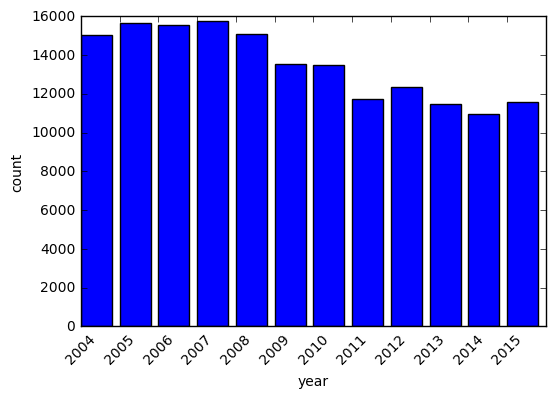

In [63]:
year = _
year.bar()

In [64]:
%%sql
SELECT YEAR, SUM(victim_count) FROM crime
GROUP BY YEAR
ORDER BY YEAR;

12 rows affected.


year,sum
2004,18003
2005,18784
2006,18495
2007,19072
2008,18027
2009,15940
2010,15830
2011,13694
2012,14392
2013,13406


<Container object of 12 artists>

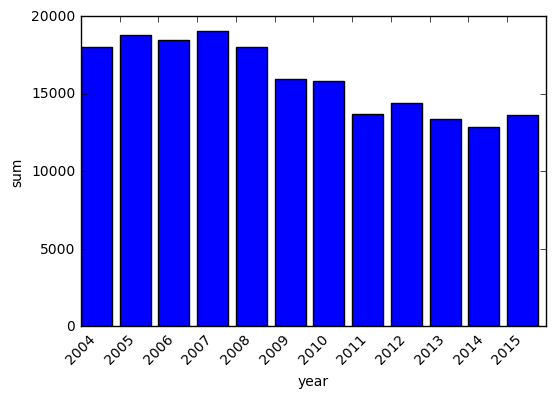

In [65]:
v = _
v.bar()

Does it have relationship with property value?

In [81]:
%%sql 
SELECT EffectiveYearBuilt,AVG(CAST(Totalvalue AS decimal)) FROM la_assessment
WHERE effectiveyearbuilt > 2003
GROUP BY EffectiveYearBuilt
ORDER BY EffectiveYearBuilt;

13 rows affected.


effectiveyearbuilt,avg
2004,824400.129296562750
2005,743208.009869468322
2006,786504.501019840534
2007,873390.801154249738
2008,1144964.512898330804
2009,1355888.097826086957
2010,1185544.314767932489
2011,1200237.783001808318
2012,1217777.606902356902
2013,1385616.086117297699


<Container object of 13 artists>

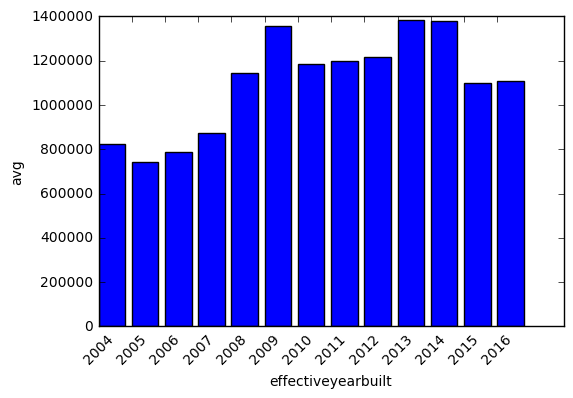

In [82]:
y = _
y.bar()

The crime count and victim count decreased in recent years, while the average house value increased sicne 2008. It may be that safer neighborhood play a part in causing the price went up. But we cannot be sure.

In [37]:
%%sql
DROP TABLE IF EXISTS crime_count

Done.


[]

In [38]:
%%sql
SELECT ZIP, COUNT, victim INTO crime_count
FROM (SELECT ZIP, COUNT(*) AS COUNT, SUM(victim_count) AS victim FROM crime
      GROUP BY ZIP) AS A;

303 rows affected.


[]

In [61]:
%%sql
SELECT * FROM crime_count

303 rows affected.


zip,count,victim
None,65510,76945
91010,714,852
91340,21,22
91341,1,3
91342,63,76
90270,519,624
91792,23,28
91706,9,10
91316,3,3
90250,281,323


In [44]:
%%sql
DROP TABLE IF EXISTS crime_house

Done.


[]

In [45]:
%%sql
SELECT ZIPcode5, VALUE INTO crime_house
FROM (SELECT ZIPcode5, AVG(CAST(Totalvalue AS decimal)) AS VALUE FROM la_assessment
      GROUP BY ZIPcode5) AS A;

284 rows affected.


[]

In [46]:
%%sql
SELECT * FROM crime_house

284 rows affected.


zipcode5,value
None,1487945.089918256131
90405,1146864.559426229508
91010,411546.165457184325
91340,314207.993119266055
91040,581858.460835509138
91342,386195.867917448405
90270,291965.714285714286
91792,338759.636898920510
91706,331306.264029438822
91207,861905.630407911001


In [47]:
%%sql
ALTER TABLE crime_house ADD COLUMN count INTEGER;

Done.


[]

In [48]:
%%sql
UPDATE crime_house
SET count = (SELECT COUNT FROM crime_count
            WHERE crime_house.ZIPcode5 = crime_count.ZIP)

284 rows affected.


[]

In [49]:
%%sql
ALTER TABLE crime_house ADD COLUMN victim INTEGER;

Done.


[]

In [50]:
%%sql
UPDATE crime_house
SET victim = (SELECT victim FROM crime_count
            WHERE crime_house.ZIPcode5 = crime_count.ZIP)

284 rows affected.


[]

In [53]:
%%sql
SELECT ROUND(value) AS value, count, victim  FROM crime_house
WHERE count >= 1
ORDER BY VALUE;

243 rows affected.


value,count,victim
164696,75,92
186520,11,16
195155,2057,2457
209439,1950,2344
215852,2220,2572
224152,405,490
231441,441,503
231919,7123,8679
240284,1245,1484
244282,957,1117


In [54]:
crime1 = _
df1 = pandas.DataFrame.from_records(crime1,columns=['value', 'count', 'victim'],index=['value'])

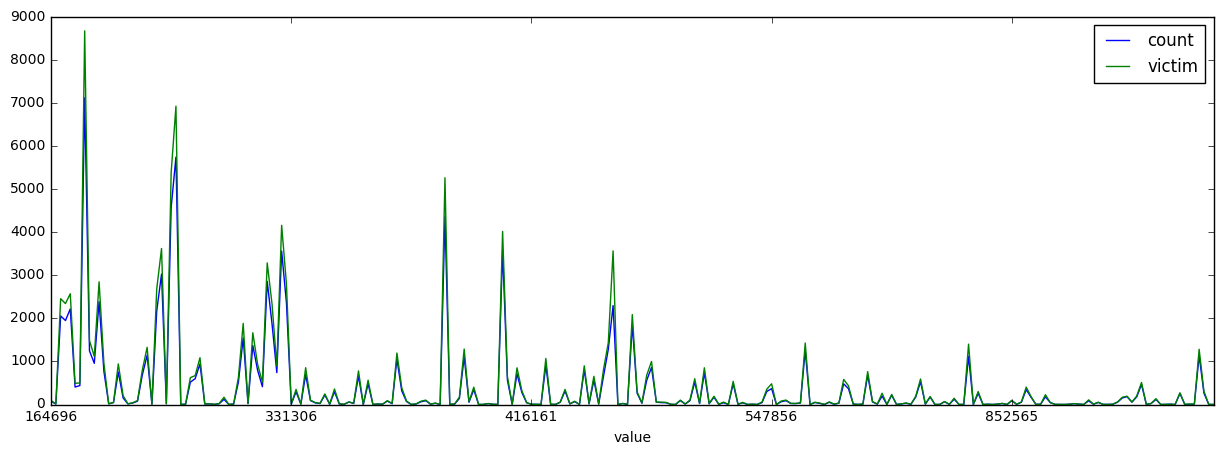

In [58]:
df1.plot(figsize=(15,5))

The crime and victim count are decreasing ovrall when property value increased.
   
There are so many variables related with property value and what we did in this project only reveal a of the secret.